In [36]:
import numpy as np
import pandas as pd

In [37]:
df = pd.read_csv('spam.csv', encoding='latin1') # encoding='latin1' bcoz the file is not in UTF-8 format.

In [38]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4970,ham,Hey come online! Use msn... We are all there,NaN,NaN,NaN
4706,ham,Wif my family booking tour package.,NaN,NaN,NaN
3902,ham,Waiting in e car 4 my mum lor. U leh? Reach ho...,NaN,NaN,NaN
5180,ham,Babe! I fucking love you too !! You know? Fuck...,NaN,NaN,NaN
508,ham,What's the significance?,NaN,NaN,NaN


In [39]:
df.shape

(5572, 5)

## Steps:
1. Data Cleaning
2. EDA
3. Text Preprocessing
4. Model Building
5. Evaluation
6. Improvement

## 1. Data Cleaning:

In [40]:
# Check if any columns are unnecessary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [41]:
# Dropping the last 3 columns as they have many null values
df.drop(columns =['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [42]:
df.sample(5)

,v1,v2
3491,ham,I will reach office around &lt;DECIMAL&gt; . ...
3584,ham,Heart is empty without love.. Mind is empty wi...
4306,ham,I guess it is useless calling u 4 something im...
4730,ham,K:)eng rocking in ashes:)
3459,ham,I am back. Bit long cos of accident on a30. Ha...


In [43]:
# Renaming the columns v1 and v2
df.rename(columns={'v1': 'target', 'v2':'text'}, inplace = True)

In [44]:
df.sample(5)

,target,text
42,spam,07732584351 - Rodger Burns - MSG = We tried to...
5008,ham,My mobile number.pls sms ur mail id.convey reg...
4518,ham,Just got part Nottingham - 3 hrs 63miles. Good...
4774,ham,So many people seems to be special at first si...
2529,ham,Can you just come in for a sec? There's somebo...


In [45]:
# Using LabelEncoder to convert 'ham' and 'spam' to numeric values

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [49]:
df['target'] = encoder.fit_transform(df['target']) # 'ham'=0 , 'spam' = 1
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [52]:
# Check for missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [55]:
# Check for duplicates
df.duplicated().sum()

403

In [58]:
# Remove duplicates
df = df.drop_duplicates(keep='first')

In [60]:
df.duplicated().sum(), df.shape

(0, (5169, 2))

## 2. EDA:

In [61]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

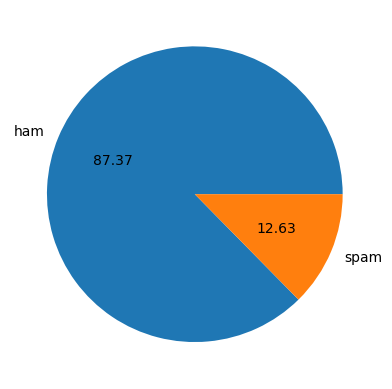

In [67]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels = ['ham', 'spam'], autopct = "%0.2f") # autopct to display percent value using string formatting
plt.show()

### Therefore, the data is imbalanced

### Making 3 columns for characters, words & sentences:

In [87]:
import nltk
import os

# Specify the path where you want to install nltk_data
nltk_data_path = r"C:\Users\shris\nltk_data"

# Check if the directory exists, if not create it
if not os.path.exists(nltk_data_path):
    os.makedirs(nltk_data_path)

# Set the path for NLTK data
nltk.data.path.append(nltk_data_path)

# Download punkt tokenizer data (or any other resource you need)
nltk.download('punkt', download_dir=nltk_data_path)


[nltk_data] Downloading package punkt to C:\Users\shris\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [88]:
import nltk

# Check if punkt is available
try:
    nltk.data.find('tokenizers/punkt')
    print("Punkt tokenizer is installed successfully.")
except LookupError:
    print("Punkt tokenizer not found.")


Punkt tokenizer is installed successfully.


In [90]:
import nltk
nltk.download('punkt_tab', download_dir=r"C:\Users\shris\nltk_data")

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\shris\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [71]:
# Characters column
df['num_characters'] = df['text'].apply(len)

In [72]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [93]:
# Col for no.of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [94]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [102]:
# Col for no.of sentences
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [98]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [104]:
# To get some statistics, use .describe
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [106]:
# Analyze ham and spam separately

# ham
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [107]:
# spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


### Plotting for both the classes:

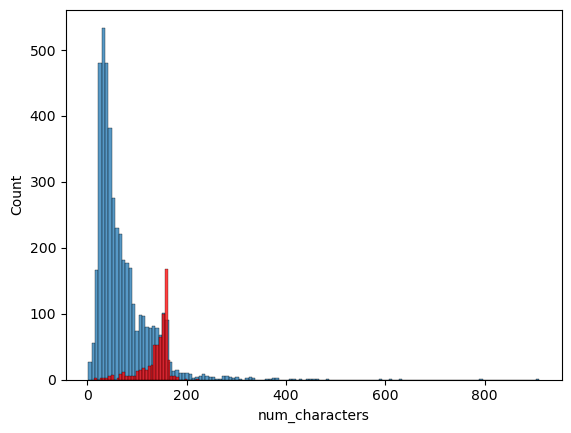

In [118]:
import seaborn as sns
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'], color='red')
plt.show()

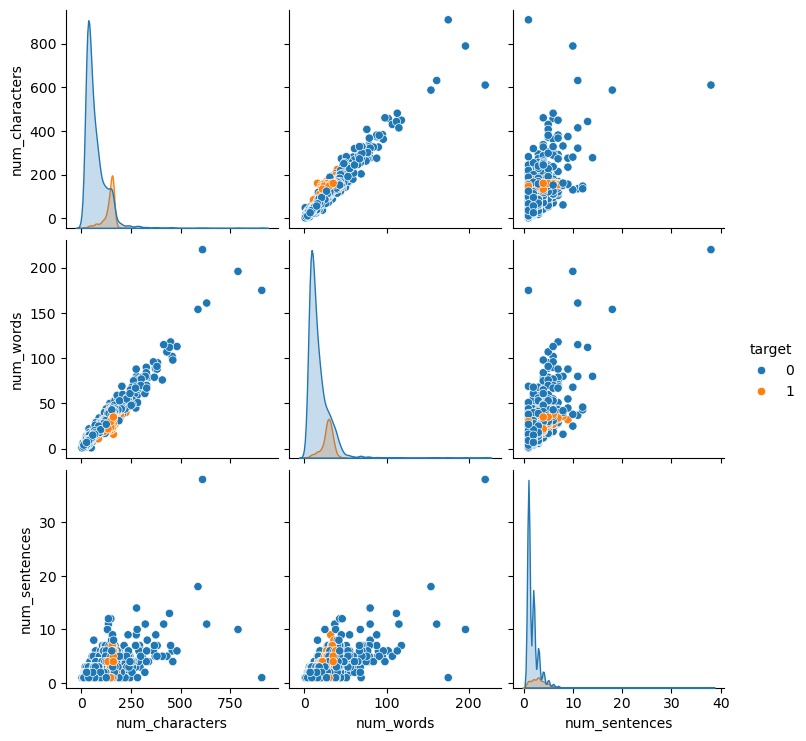

In [119]:
# To see the relationship btw diff cols
sns.pairplot(df, hue='target')

## 3. Text Preprocessing:
* Lower case
* Tokenization
* Removing special characters
* Removing stop words and punctuation
* Stemming

In [154]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [148]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shris\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [155]:
transform_text('hi how are you running Shrisha!!?')

'hi run shrisha'

In [162]:
df['transformed_text'] = df['text'].apply(transform_text)

In [163]:
df.head()

,target,text,num_characters,num_words,num_sentences,transormed_text,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though,nah think goe usf live around though


In [164]:
# To use get the most important words, use Wordcloud
from wordcloud import WordCloud
wc = WordCloud(width = 500, height=500, min_font_size= 10, background_color='white')

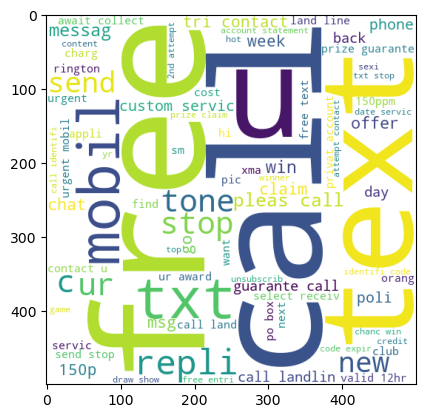

In [166]:
# Spam
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))
plt.imshow(spam_wc);

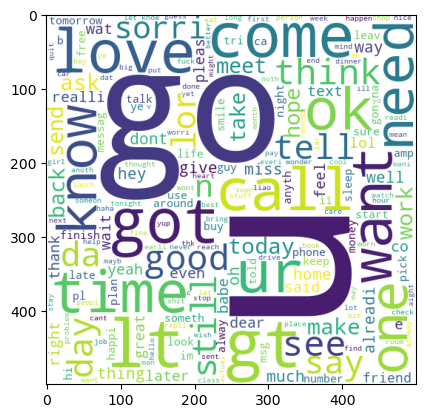

In [167]:
# ham
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.imshow(ham_wc);

In [168]:
# Getting all the spam words
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [169]:
len(spam_corpus)

9939

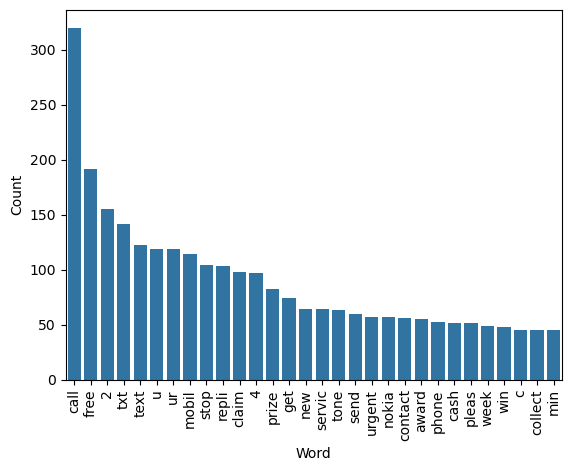

In [178]:
from collections import Counter
# Get the 30 most common words from the corpus
common_words = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Count'])

# Create the bar plot
sns.barplot(x='Word', y='Count', data=common_words)
plt.xticks(rotation='vertical')
plt.show();

In [179]:
# Getting all the ham words
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [180]:
len(ham_corpus)

35404

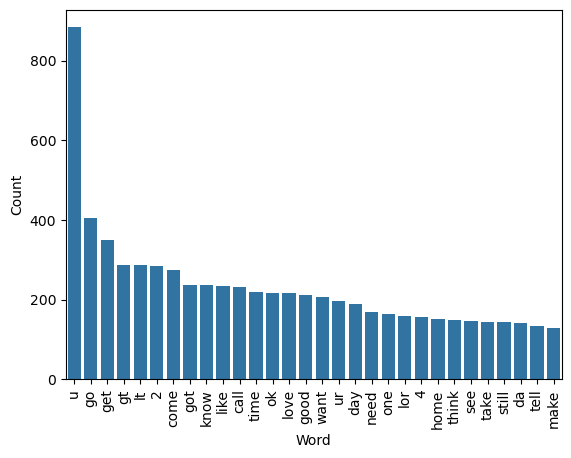

In [181]:
from collections import Counter
# Get the 30 most common words from the corpus
common_words = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['Word', 'Count'])

# Create the bar plot
sns.barplot(x='Word', y='Count', data=common_words)
plt.xticks(rotation='vertical')
plt.show();

## 4. Model Building:

In [206]:
# Convert the text to vectors , CountVectorizer is an implementation of the Bag of Words (BoW) model in scikit-learn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)

In [207]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [208]:
X.shape

(5169, 3000)

In [209]:
y = df['target'].values

In [210]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [211]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [212]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [213]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [214]:
# training
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [215]:
# training
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [216]:
# training
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


* Since the data is imbalanced, precision is more important than accuracy

In [218]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl','wb'))